In [1]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline


d:\ProgramData\anaconda3\envs\torchenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion", torch_dtype=torch.float16).to(
    device
)

model_index.json: 100%|██████████| 546/546 [00:00<?, ?B/s] 
d:\ProgramData\anaconda3\envs\torchenv\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vivek\.cache\huggingface\diffusers\models--nitrosocke--Ghibli-Diffusion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
text_encoder\model.safetensors n

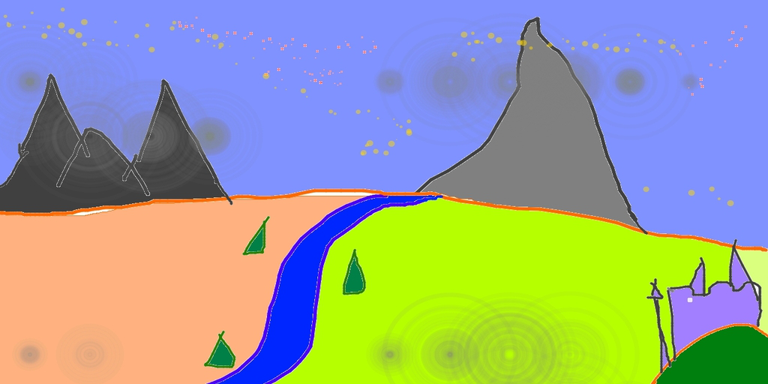

In [4]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))
init_image

100%|██████████| 37/37 [00:06<00:00,  5.90it/s]


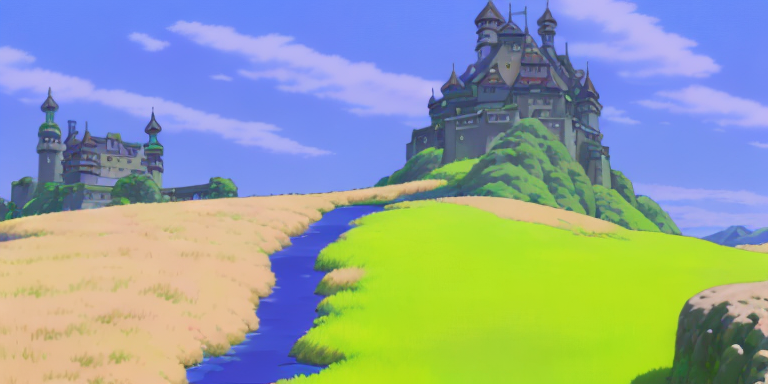

In [5]:
prompt = "ghibli style, a fantasy landscape with castles"
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image

100%|██████████| 37/37 [00:06<00:00,  6.04it/s]


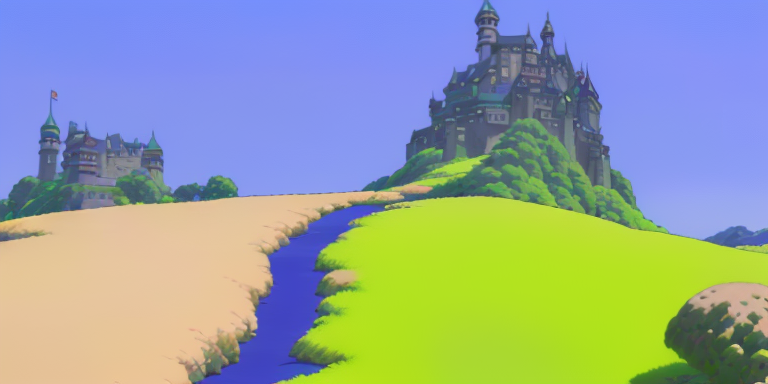

In [6]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = lms
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image